In [13]:
import pandas as pd

In [79]:
df_bookings=pd.read_csv("datasets/fact_bookings.csv")
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


# Data Exploration

In [8]:
df_bookings.shape

(134590, 12)

In [14]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [16]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

<Axes: xlabel='booking_platform'>

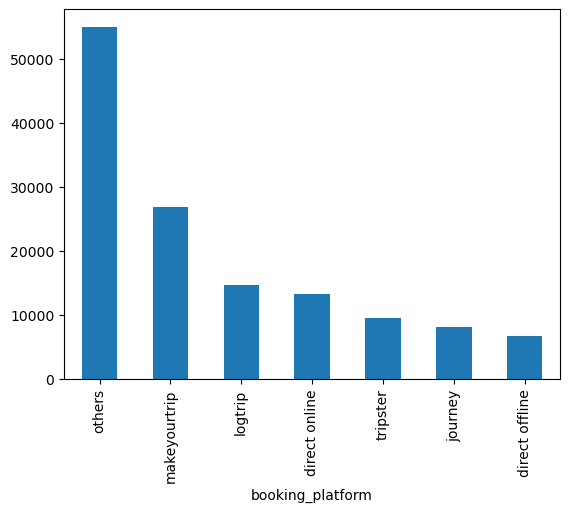

In [26]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

In [28]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [29]:
df_bookings.revenue_generated.min()

6500

In [30]:
df_bookings.revenue_generated.max()

28560000

In [90]:
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')

In [45]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [8]:
df_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [52]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

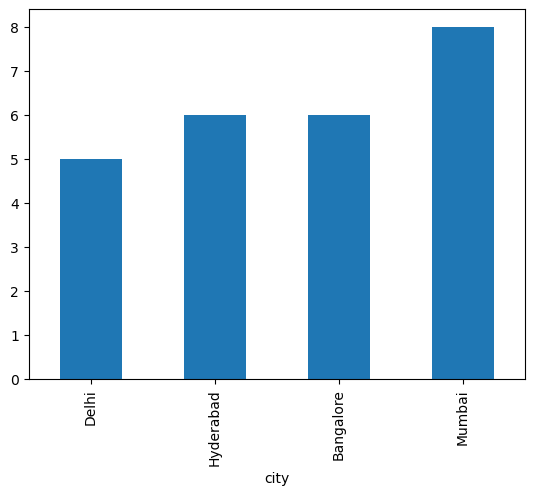

In [9]:
df_hotels.city.value_counts().sort_values().plot(kind="bar")

In [4]:
df_aggbookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [16]:
uniquepropid=df_aggbookings.property_id.unique()
uniquepropid

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [24]:
df_aggbookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [36]:
df_aggbookings[df_aggbookings.successful_bookings>df_aggbookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [49]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [44]:
df_aggbookings.capacity.max()

50.0

In [60]:
df_bookings=df_bookings[df_bookings.no_guests>0]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [64]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [66]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [30]:
df_aggbookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [68]:
avg, std

(15378.036937686695, 93040.15493143328)

In [70]:
upper_limit=avg+3*std
upper_limit

294498.50173198653

In [71]:
lower_limit=avg-3*std
lower_limit

-263742.4278566132

In [75]:
df_bookings=df_bookings[df_bookings.revenue_generated<upper_limit]
df_bookings.shape

(134573, 12)

In [78]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [79]:
upper_limit=df_bookings.revenue_realized.mean()+3*df_bookings.revenue_realized.std()

In [80]:
upper_limit

33479.3586618449

In [82]:
df_bookings[df_bookings.room_category=='RT4']

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
47,May012216558RT41,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT4,logtrip,NaN,Cancelled,26600,10640
48,May012216558RT42,16558,27-04-22,1/5/2022,2/5/2022,1.0,RT4,tripster,NaN,Checked Out,26600,26600
49,May012216558RT43,16558,29-04-22,1/5/2022,4/5/2022,2.0,RT4,direct offline,NaN,Cancelled,26600,10640
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
138,May012216559RT42,16559,11/4/2022,1/5/2022,3/5/2022,2.0,RT4,direct offline,NaN,Cancelled,32300,12920
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [85]:
df_aggbookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [87]:
df_aggbookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [88]:
df_aggbookings[df_aggbookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [89]:
df_aggbookings.capacity.median()

25.0

In [94]:
df_aggbookings.capacity.fillna(df_aggbookings.capacity.median(), inplace=True)

In [99]:
df_aggbookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


In [103]:
df_aggbookings=df_aggbookings[df_aggbookings.successful_bookings>df_aggbookings.capacity]

In [106]:
df_aggbookings

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [108]:
df_aggbookings.shape

(6, 5)

# Data Transformation

In [6]:
df_aggbookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [7]:
df_aggbookings["occ_perc"]=df_aggbookings["successful_bookings"]/df_aggbookings["capacity"]

In [8]:
df_aggbookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_perc
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222
9196,16559,31-Jul-22,RT4,13,18.0,0.722222
9197,17558,31-Jul-22,RT4,3,6.0,0.500000
9198,19563,31-Jul-22,RT4,3,6.0,0.500000


In [9]:
df_aggbookings["occ_perc"]=df_aggbookings["occ_perc"].apply(lambda x: round(x*100, 2))
df_aggbookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_perc
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


In [11]:
df_aggbookings.groupby("room_category")["occ_perc"].mean().round(2)

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_perc, dtype: float64

In [19]:
df_rooms=pd.read_csv("datasets/dim_rooms.csv")
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [22]:
df=pd.merge(df_aggbookings, df_rooms, left_on="room_category", right_on="room_id")
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_perc,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential


In [28]:
df.groupby("room_class")["occ_perc"].mean()

room_class
Elite           58.040278
Premium         58.028213
Presidential    59.300461
Standard        58.224247
Name: occ_perc, dtype: float64

In [29]:
df.drop("room_id", axis=1, inplace=True)

In [30]:
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_perc,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard
...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential


In [33]:
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [37]:
df=pd.merge(df, df_hotels, on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_perc,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai


<Axes: xlabel='city_y'>

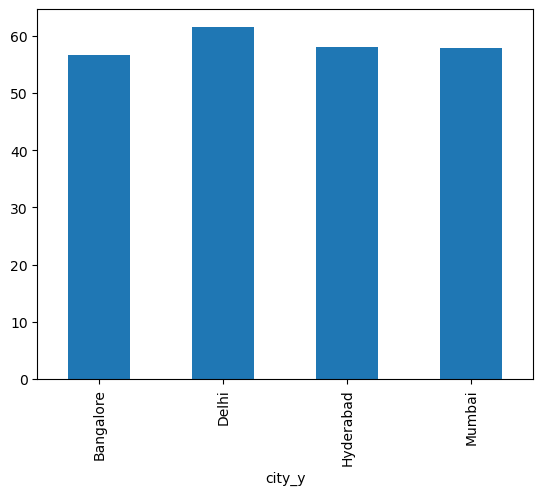

In [39]:
df.groupby("city_y")["occ_perc"].mean().plot(kind="bar")

In [42]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [44]:
df=pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_perc,room_class,property_name_x,category_x,city_x,...,category_y,city_y,date_x,mmm yy_x,week no_x,day_type_x,date_y,mmm yy_y,week no_y,day_type_y
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,...,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,...,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,...,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday,10-May-22,May 22,W 20,weekeday


In [46]:
df.groupby("day_type_y")["occ_perc"].mean().round(2)

day_type_y
weekeday    50.90
weekend     72.39
Name: occ_perc, dtype: float64

In [51]:
df["mmm yy_y"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [53]:
df_Jun_22=df[df["mmm yy_y"]=="Jun 22"]
df_Jun_22.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_perc,room_class,property_name_x,category_x,city_x,...,category_y,city_y,date_x,mmm yy_x,week no_x,day_type_x,date_y,mmm yy_y,week no_y,day_type_y
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday,10-Jun-22,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,63.41,Elite,Atliq Exotica,Luxury,Mumbai,...,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday,10-Jun-22,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,...,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday,10-Jun-22,Jun 22,W 24,weekeday


In [66]:
df_Jun_22.groupby("city_x")["occ_perc"].mean().round(2).sort_values(ascending=True)

city_x
Bangalore    56.58
Mumbai       58.38
Hyderabad    58.46
Delhi        62.47
Name: occ_perc, dtype: float64

In [70]:
df_aug=pd.read_csv("datasets/new_data_august.csv")
df_aug.head(2)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.0
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.0


In [71]:
df.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_perc,room_class,property_name_x,category_x,city_x,...,category_y,city_y,date_x,mmm yy_x,week no_x,day_type_x,date_y,mmm yy_y,week no_y,day_type_y
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,...,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,...,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday,10-May-22,May 22,W 20,weekeday


In [72]:
latest_df=pd.concat([df, df_aug], axis=0, ignore_index=True) 

In [77]:
latest_df.tail(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_perc,room_class,property_name_x,category_x,city_x,...,mmm yy_y,week no_y,day_type_y,property_name,category,city,mmm yy,week no,day_type,occ%
6504,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,NaN,NaN,NaN,...,NaN,NaN,NaN,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday,76.92
6505,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,NaN,NaN,NaN,...,NaN,NaN,NaN,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday,69.23
6506,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,NaN,NaN,NaN,...,NaN,NaN,NaN,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday,62.50


In [80]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100


In [82]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [87]:
rev_real_city=pd.merge(df_bookings, df_hotels, on="property_id")
rev_real_city.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi


In [89]:
rev_real_city.groupby("city")["revenue_realized"].sum()

city
Bangalore    420397050
Delhi        294500318
Hyderabad    325232870
Mumbai       668640991
Name: revenue_realized, dtype: int64

In [107]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [108]:
df_bookings.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [109]:
rev_hotel_type=pd.merge(df_bookings, df_hotels, on="property_id")

In [110]:
rev_hotel_type.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi


In [113]:
rev_hotel_type.groupby("category")["revenue_realized"].sum()

category
Business     656019297
Luxury      1052751932
Name: revenue_realized, dtype: int64

In [114]:
df_bookings.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [119]:
rev_hotel_type.groupby("city")["ratings_given"].mean().round(1)

city
Bangalore    3.4
Delhi        3.8
Hyderabad    3.7
Mumbai       3.7
Name: ratings_given, dtype: float64

<Axes: ylabel='revenue_realized'>

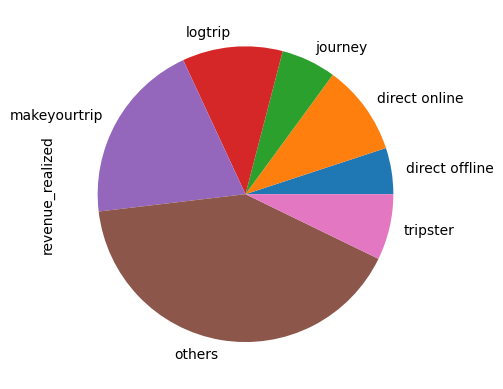

In [126]:
df_bookings.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")